In [2]:

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
sleep_data = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\data files\Sleep_health_and_lifestyle_dataset.csv")
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
sleep_data.describe()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


<Axes: xlabel='BMI Category', ylabel='count'>

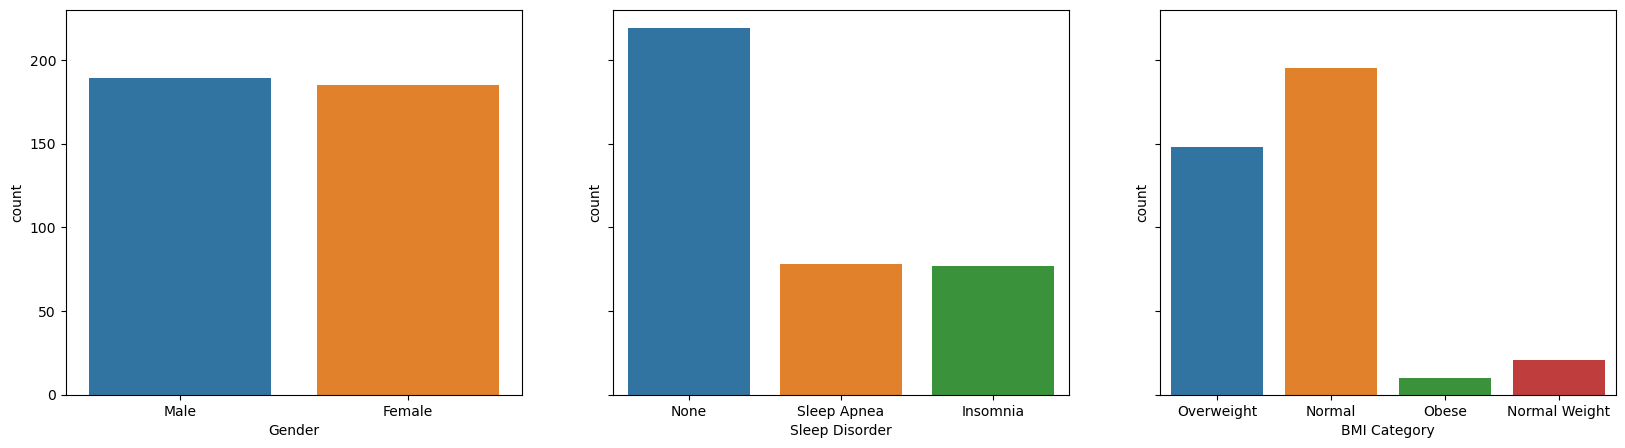

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
sns.countplot(ax=axes[0], x='Gender', data = sleep_data)
sns.countplot(ax=axes[1], x='Sleep Disorder', data = sleep_data)
sns.countplot(ax=axes[2], x='BMI Category', data = sleep_data)

<Axes: xlabel='Occupation', ylabel='count'>

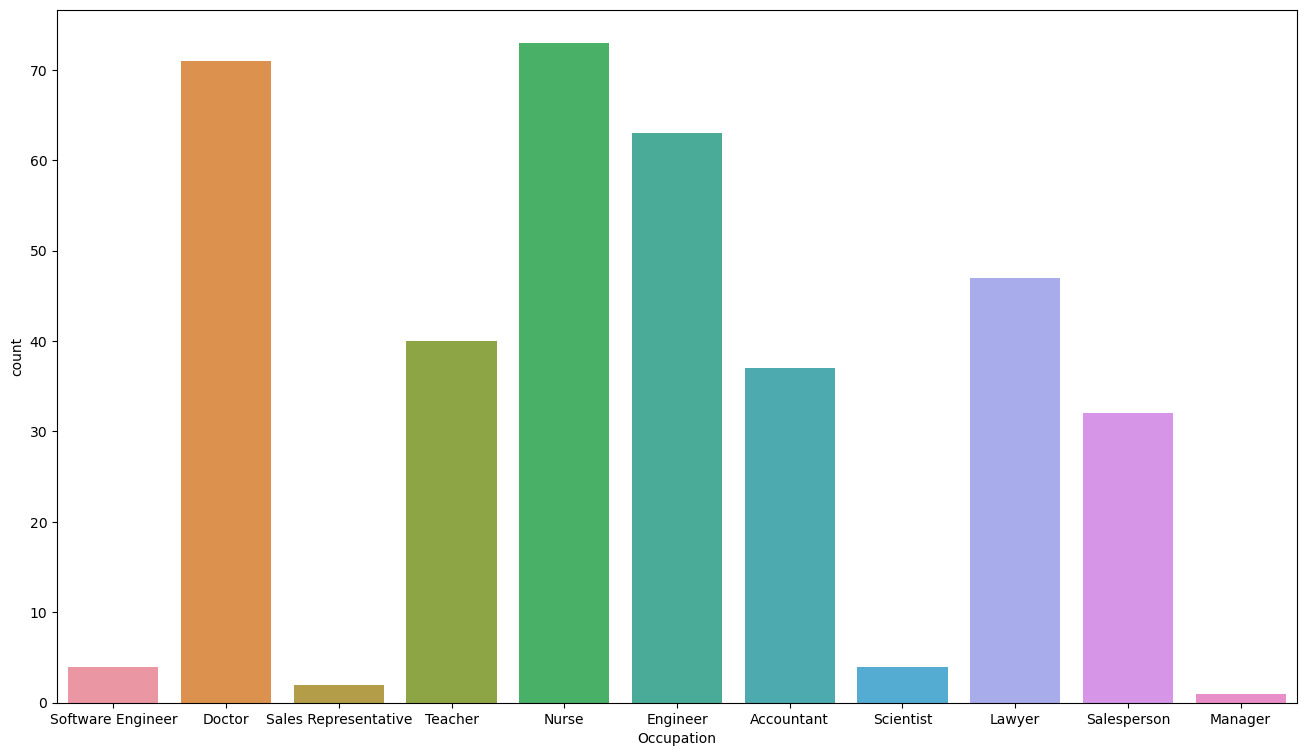

In [7]:
fig, ax = plt.subplots(figsize =(16, 9))
sns.countplot(x='Occupation', data = sleep_data)


In [8]:
def bp_status(bp):
    if bp == "115/75" or bp == "117/76" or bp == "115/78" or bp == "119/77" or bp == "118/75" or bp == "118/76":
        return "Normal"
    elif bp == "140/95" or bp == "140/90" or bp == "142/92":
        return "Hypertension stage 2"
    elif bp == "130/85" or bp == "135/90" or bp == "132/87" or bp == "130/86" or bp == "131/86" or bp == "135/88" or bp == "139/91":
        return "Hypertension stage 1"
    else:
        return "Elevated"

In [9]:
sleep_data['Blood_pressure_status'] = sleep_data['Blood Pressure'].apply(bp_status)

In [10]:
sleep_data.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood_pressure_status
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,Elevated
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,Elevated
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,Elevated
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension stage 2
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension stage 2


In [11]:
sleep_data['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [28]:
BP_status = sleep_data[['Gender','Occupation', 'Blood_pressure_status']]
BP_grp = BP_status.groupby(['Blood_pressure_status', 'Occupation'], as_index=False).count()
BP_grp


,Blood_pressure_status,Occupation,Gender
0,Elevated,Doctor,65
1,Elevated,Engineer,44
2,Elevated,Lawyer,3
3,Elevated,Manager,1
4,Elevated,Nurse,3
5,Elevated,Scientist,2
6,Elevated,Software Engineer,3
7,Elevated,Teacher,4
8,Hypertension stage 1,Accountant,6
9,Hypertension stage 1,Doctor,2


In [20]:
bp_pivot = BP_grp.pivot(index= 'Blood_pressure_status', columns='Occupation')
bp_pivot

Gender                                       \
Occupation            Accountant Doctor Engineer Lawyer Manager Nurse   
Blood_pressure_status                                                   
Elevated                     NaN   65.0     44.0    3.0     1.0   3.0   
Hypertension stage 1         6.0    2.0     18.0   44.0     NaN   4.0   
Hypertension stage 2         NaN    2.0      NaN    NaN     NaN  65.0   
Normal                      31.0    2.0      1.0    NaN     NaN   1.0   

                                                                  \
Occupation            Sales Representative Salesperson Scientist   
Blood_pressure_status                                              
Elevated                               NaN         NaN       2.0   
Hypertension stage 1                   NaN        32.0       2.0   
Hypertension stage 2                   2.0         NaN       NaN   
Normal                                 NaN         NaN       NaN   

                                                 
Occupation            Software Engineer Teacher  
Blood_pressure_status                            
Elevated                            3.0     4.0  
Hypertension stage 1                NaN    29.0  
Hypertension stage 2                1.0     1.0  
Normal                              NaN     6.0

In [22]:
sleep_disorder = sleep_data[['Sleep Disorder', 'Occupation', 'Blood_pressure_status']]
sd_grp = sleep_disorder.groupby(['Sleep Disorder', 'Occupation'], as_index=False).count()
sd_grp

,Sleep Disorder,Occupation,Blood_pressure_status
0,Insomnia,Accountant,7
1,Insomnia,Doctor,3
2,Insomnia,Engineer,5
3,Insomnia,Lawyer,2
4,Insomnia,Nurse,3
5,Insomnia,Salesperson,29
6,Insomnia,Software Engineer,1
7,Insomnia,Teacher,27
8,None,Accountant,30
9,None,Doctor,64


In [23]:
sd_pivot = sd_grp.pivot(index= 'Sleep Disorder', columns='Occupation')
sd_pivot

Blood_pressure_status                                       \
Occupation                Accountant Doctor Engineer Lawyer Manager Nurse   
Sleep Disorder                                                              
Insomnia                         7.0    3.0      5.0    2.0     NaN   3.0   
None                            30.0   64.0     57.0   42.0     1.0   9.0   
Sleep Apnea                      NaN    4.0      1.0    3.0     NaN  61.0   

                                                                             \
Occupation     Sales Representative Salesperson Scientist Software Engineer   
Sleep Disorder                                                                
Insomnia                        NaN        29.0       NaN               1.0   
None                            NaN         2.0       2.0               3.0   
Sleep Apnea                     2.0         1.0       2.0               NaN   

                        
Occupation     Teacher  
Sleep Disorder          
Insomnia          27.0  
None               9.0  
Sleep Apnea        4.0

In [24]:
bmi = sleep_data[['BMI Category', 'Occupation', 'Blood_pressure_status']]
bmi_grp = bmi.groupby(['BMI Category', 'Occupation'], as_index=False).count()
bmi_grp

,BMI Category,Occupation,Blood_pressure_status
0,Normal,Accountant,26
1,Normal,Doctor,65
2,Normal,Engineer,56
3,Normal,Lawyer,42
4,Normal,Teacher,6
5,Normal Weight,Accountant,5
6,Normal Weight,Doctor,2
7,Normal Weight,Engineer,4
8,Normal Weight,Lawyer,1
9,Normal Weight,Nurse,7


In [25]:
bmi_pivot = bmi_grp.pivot(index= 'BMI Category', columns='Occupation')
bmi_pivot

Blood_pressure_status                                       \
Occupation               Accountant Doctor Engineer Lawyer Manager Nurse   
BMI Category                                                               
Normal                         26.0   65.0     56.0   42.0     NaN   NaN   
Normal Weight                   5.0    2.0      4.0    1.0     NaN   7.0   
Obese                           NaN    4.0      NaN    2.0     NaN   NaN   
Overweight                      6.0    NaN      3.0    2.0     1.0  66.0   

                                                                            \
Occupation    Sales Representative Salesperson Scientist Software Engineer   
BMI Category                                                                 
Normal                         NaN         NaN       NaN               NaN   
Normal Weight                  NaN         NaN       NaN               2.0   
Obese                          2.0         NaN       NaN               1.0   
Overweight                     NaN        32.0       4.0               1.0   

                       
Occupation    Teacher  
BMI Category           
Normal            6.0  
Normal Weight     NaN  
Obese             1.0  
Overweight       33.0

In [27]:
sleep_data.to_csv('sleep.csv')
